# Neural Networks

By now you should be aware of the "Machine Learning" revolution.  We have chatbots which can answer questions in legible prose.  Computer art generators take a prompt, and draw a fantastical picture which matches it.  There has been a lot of interest in finding ways to apply this technology in Physics.  So far we have not found very many good physics uses for this tool, but it is something which should be in your toolbelt.

One key tool in Machine Learning is the Neural Network.  Functionally, a Neural Network is a highly parameterized function.  It has $N$ inputs, $M$ outputs, and a large number of parameters.  We have tools which allow us to tune these parameters so that the Neural Network can mimic any other function with $N$ inputs and $M$ outputs.  

As a concrete example, think of the text generating component of a chatbot.  Typically it will takes as input the previous few words in the text, and gives the next word as output.  The parameters are chosen so that it tries to match examples of text that it was trained with.

Here is a illustrative figure from [a blog post](https://bansalh944.medium.com/text-generation-using-lstm-b6ced8629b03)
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*phpgEszN4Q6n_Rtd24zpGw.png">

Another example is image recognition.  Input is the pixels of an image.  Output is a label:  "dog", "cat"...  The parameters are chosen so that it gives the right label for a set of training data.

## Load Packages

In [1]:
using Plots

## Perceptron Layer

In [2]:
struct activation
    f  # f(x)
    df # df/dx as a function of f
end

#examply let f=tanh(x)
# then df/dx=1/cosh^2(x)
# but 1-tanh^2(x)=cosh^2(x)
# so df/dx=1-f^2
a_tanh=activation(tanh,f->1-f^2)

function f_relu(x)
    if x>0
        return x
    else
        return 0
    end
end

function df_relu(f)
    if f>0
        return 1
    else
        return 0
    end
end

a_relu=activation(f_relu,df_relu)

f_logistic(x)=1/(1+exp(-x))
df_logistic(f)=f*(1-f)

a_logistic=activation(f_logistic,df_logistic)

a_identity=activation(identity,x->1)

a_quadratic=activation(x->x^2,f->2*sqrt(f))

activation(var"#5#7"(), var"#6#8"())

In [3]:
function showactivation(a::activation,xvals)
    fvals=[a.f(x) for x in xvals]
    dfvals=[a.df(f) for f in fvals]
    plot(xvals,fvals,label="f")
    plot!(xvals,dfvals,label="df/dx")
end

showactivation (generic function with 1 method)

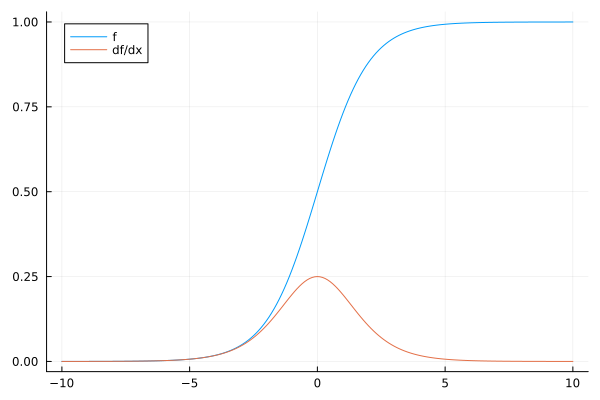

In [4]:
showactivation(a_logistic,-10:0.1:10)

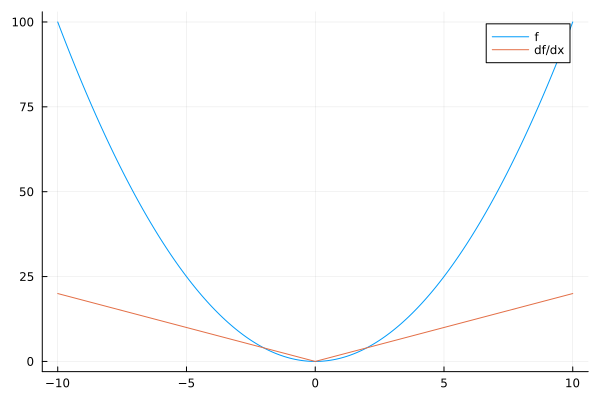

In [5]:
showactivation(a_quadratic,-10:0.1:10)

In [6]:
mutable struct layer
    w # Weights matrix
    b # offset matrix
    a :: activation # activation 
    input
    output 
    dzdin # result of back-propegation -- derivative  final output wrt input
    dzdw # result of back-propegation -- derivative of final output wrt w 
    dzdb # result of back=propegation -- derivative of final output wrt b
end

#constructors
layer(w,b,a)=layer(w,b,a,[],[],[],[],[])
layer(;w,b,a)=layer(w,b,a)

#Act on data with the layer
function (l::layer)(input)
    l.input=stack(input)
    l.output=l.a.f.(l.w*input.+l.b)
    return l.output
end

function backpropegate!(l::layer,doutputdz)
    dzdlin= l.a.df.(l.output).*doutputdz #derivitative of z wrt linear part
    l.dzdb=sum(dzdlin,dims=2) #sum over all elements of batch
    l.dzdw=dzdlin*l.input'  #the matrix multiply with the conjugate automatically does the batch sum
    l.dzdin=l.w'*dzdlin
    return l.dzdin
end     

backpropegate! (generic function with 1 method)

In [7]:
function update!(l::layer,rate)
    l.w-=rate*l.dzdw
    l.b-=rate*l.dzdb
    return l
end

update! (generic function with 1 method)

In [8]:
struct tmp2
    data
end

Base.iterate(s::tmp2,x...)=Base.iterate(s.data,x...)
#Base.iterate(s::tmp2,x::Int64)=Base.iterate(s.data,x)

In [9]:
t=tmp2(["a","b","c"])

tmp2(["a", "b", "c"])

In [10]:
for j in t
    print(j)
end

abc

In [170]:
mutable struct network
    data  # list of layers
end

function (n::network)(input)  # forward pass
    y=input
    for l in n.data
        y=l(y)
    end
    return y
end

function input(n::network)
    return n.data[1].input
end

function output(n::network)
    return n.data[end].output
end

#Iterate over layers
Base.iterate(n::network,varargs...)=Base.iterate(n.l,varargs...)

struct cost
    c # function of result and target which gives cost
    dc # function of result and target which gives dcost/dtarget
end

    

In [172]:
#Mean Square Error
c_mse(result,target)=sum((result.-target).^2)/length(result)
dc_mse(result,target)=2*(result.-target)/length(result)
cost_mse=cost(c_mse,dc_mse)

#Log Loss
c_ll(result,target)=sum(@. (target*log(result)-(1 -target)*log(1-result)))/length(result)
dc_ll(result,target)=@. (target/result+(1-target)/(1-result))/length(result)
cost_ll=cost(c_ll,dc_ll)

cost(c_ll, dc_ll)

In [ ]:
function gradient!(n::network,target,costfun::cost)
    error=costfun.c(n.output,target)
    grad=costfun.dc(n.output,target)
            

function update!(net::network,rate)
    for l in network
        update!(l,rate)
    end
    return net
end

In [ ]:
function evaluate(layers,input)
    

In [159]:
Base.rest(["a","b","c"],2)

2-element Vector{String}:
 "b"
 "c"

In [146]:
l1=layer(w=[1. 2. 3.; 4. 5. 6.],b=[7. , 8.],a=a_logistic)

layer([1.0 2.0 3.0; 4.0 5.0 6.0], [7.0, 8.0], activation(f_logistic, df_logistic), Any[], Any[], Any[], Any[], Any[])

In [ ]:
l2=layer(w=[1. 2. 3.; 4. 5. 6.],b=[7. , 8.],a=a_logistic)

In [144]:
@time l1([1,1,1])

  0.000027 seconds (8 allocations: 448 bytes)


2-element Vector{Float64}:
 0.999997739675702
 0.9999999998973812

In [138]:
backpropegate(l1,[1,0])

3-element Vector{Float64}:
 26.0
 52.0
 78.0

In [111]:
l1.w

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [113]:
l1.input'

1×3 adjoint(::Vector{Int64}) with eltype Int64:
 1  1  1

In [112]:
l1.dzdb

2-element Vector{Float64}:
 26.0
  0.0

In [139]:
l1(stack([[1,1,1],[1,1,1],[2,2,2],[2,2,2]]))

2×4 Matrix{Int64}:
 169  169   361   361
 529  529  1444  1444

In [140]:
backpropegate(l1,stack([[1,0],[1,0],[1,0],[1,0]]))

3×4 Matrix{Float64}:
 26.0  26.0   38.0   38.0
 52.0  52.0   76.0   76.0
 78.0  78.0  114.0  114.0

In [118]:
l1.dzdb

2×4 Matrix{Float64}:
 26.0  26.0  38.0  38.0
  0.0   0.0   0.0   0.0

In [123]:
sum(l1.dzdb,dims=1)

1×4 Matrix{Float64}:
 26.0  26.0  38.0  38.0

In [124]:
sum(l1.dzdb,dims=2)

2×1 Matrix{Float64}:
 128.0
   0.0

In [128]:
sum([1,2,3],dims=2)

3-element Vector{Int64}:
 1
 2
 3

In [105]:
l1.dzdw

2×3 Matrix{Float64}:
 500.0  500.0  500.0
   0.0    0.0    0.0

In [101]:
l1.w

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [102]:
l1.b

2-element Vector{Int64}:
 7
 8

In [68]:
stack([[1,1,1],[2,2,2],[3,3,3],[4,4,4]])

3×4 Matrix{Int64}:
 1  2  3  4
 1  2  3  4
 1  2  3  4

In [70]:
v1=[1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [71]:
v2=stack(v1)

3-element Vector{Int64}:
 1
 2
 3

In [72]:
v2[2]=4

4

In [73]:
v1

3-element Vector{Int64}:
 1
 2
 3

In [69]:
stack([1,1,1])

3-element Vector{Int64}:
 1
 1
 1

In [63]:
l1.w*stack([[1,1,1],[2,2,2],[3,3,3],[4,4,4]]).+l1.b

2×4 Matrix{Int64}:
 13  19  25  31
 23  38  53  68

In [66]:
l1([2,2,2])

2-element Vector{Int64}:
 19
 38

In [49]:
backpropegate(l1,[0 1])

1×3 Matrix{Int64}:
 4  5  6

In [50]:
eps=1e-10
(l1([1+eps,1,1])-l1([1-eps,1,1]))/(2*eps)

2-element Vector{Float64}:
 1.000000082740371
 4.000000330961484

In [48]:
eps=1e-10
(l1([1,1+eps,1])-l1([1,1-eps,1]))/(2*eps)

2-element Vector{Float64}:
 2.000000165480742
 5.000018177270249

In [32]:
[1 1]

1×2 Matrix{Int64}:
 1  1